In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv('../csv/Sales Records.csv')

# 복습
1. Order Date 의 값을 시계열 변경
2. Order week 컬럼을 생성하여 요일데이터 저장
3. 국가, 요일별 Total Profit의 평균, 합계를 구하시오

In [3]:
sales.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [18]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%Y-%m-%d')

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          10000 non-null  object        
 1   Country         10000 non-null  object        
 2   Item Type       10000 non-null  object        
 3   Sales Channel   10000 non-null  object        
 4   Order Priority  10000 non-null  object        
 5   Order Date      10000 non-null  datetime64[ns]
 6   Order ID        10000 non-null  int64         
 7   Ship Date       10000 non-null  object        
 8   Units Sold      10000 non-null  int64         
 9   Unit Price      10000 non-null  float64       
 10  Unit Cost       10000 non-null  float64       
 11  Total Revenue   10000 non-null  float64       
 12  Total Cost      10000 non-null  float64       
 13  Total Profit    10000 non-null  float64       
 14  Order Week      10000 non-null  object        
dtypes: 

In [20]:
sales['Order Week'] = sales['Order Date'].dt.day_name()

In [21]:
sales.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Week
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0,Thursday
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5,Monday


In [22]:
sales_group = sales.groupby(['Country', 'Order Week']).agg(['mean','sum'])['Total Profit']



C:\Users\ssjjk\AppData\Local\Temp\ipykernel_14380\2880723224.py:1: FutureWarning: ['Region', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sales_group = sales.groupby(['Country', 'Order Week']).agg(['mean','sum'])['Total Profit']


In [24]:
sales_group

mean         sum
Country     Order Week                           
Afghanistan Friday      376621.976364  4142841.74
            Monday      278274.641818  3061021.06
            Saturday    331002.587273  3641028.46
            Sunday      605732.007500  2422928.03
            Thursday    304958.776667   914876.33
...                               ...         ...
Zimbabwe    Saturday    114521.195000   916169.56
            Sunday      449273.867143  3144917.07
            Thursday    249511.857143  1746583.00
            Tuesday     217007.090000  1519049.63
            Wednesday   506777.501875  8108440.03

[1294 rows x 2 columns]

# corona
1. 파일 로드
2. createDt 시계열데이터로 변경
3. 요일 컬럼 생성 요일 대입
4. createDt를 기준으로 오름차순 정렬
5. 일일 확진자 컬럼 생성 decideCnt의 차이를 대입
6. 요일별 일일확진자의 평균값 출력
7. 요일별 일일 확진자를 시각화 (바형 그래프)

In [25]:
corona = pd.read_csv('../csv/corona.csv')
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [26]:
import matplotlib.pyplot as plt

In [28]:
corona['createDt'] = pd.to_datetime(corona['createDt'], format = '%Y-%m-%d')

In [29]:
corona['요일'] = corona['createDt'].dt.day_name()

In [36]:
corona.sort_values('createDt',inplace=True)

In [37]:
corona['일일확진자'] = corona['decideCnt'].diff()

In [43]:
mean = corona.groupby('요일').mean()[['일일확진자']]

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_14380\3791252285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = corona.groupby('요일').mean()[['일일확진자']]


In [44]:
mean

,일일확진자
요일,
Friday,22542.854701
Monday,14862.586207
Saturday,22555.948718
Sunday,20628.745763
Thursday,25776.267241
Tuesday,21969.837607
Wednesday,26994.550847


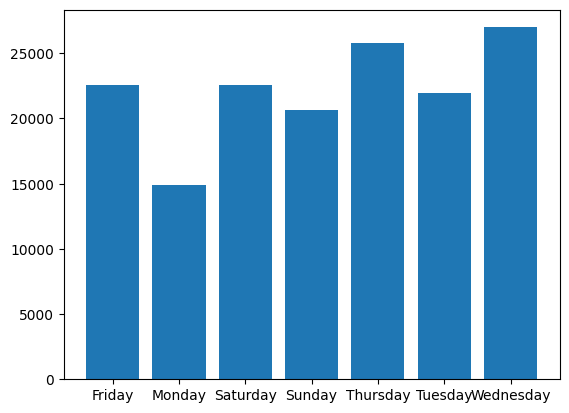

In [47]:
x = mean.index
y = mean['일일확진자']

plt.bar(x,y)
plt.show()